### MNIST 데이터

In [5]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [8]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3880 - accuracy: 0.8877 - val_loss: 0.1098 - val_accuracy: 0.9686
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0917 - accuracy: 0.9728 - val_loss: 0.0872 - val_accuracy: 0.9735
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0542 - accuracy: 0.9840 - val_loss: 0.0751 - val_accuracy: 0.9779
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0325 - accuracy: 0.9902 - val_loss: 0.0597 - val_accuracy: 0.9816
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0253 - accuracy: 0.9926 - val_loss: 0.0684 - val_accuracy: 0.9776
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0722 - val_accuracy: 0.9793
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0617 - val_accuracy: 0.9827
Epoch 

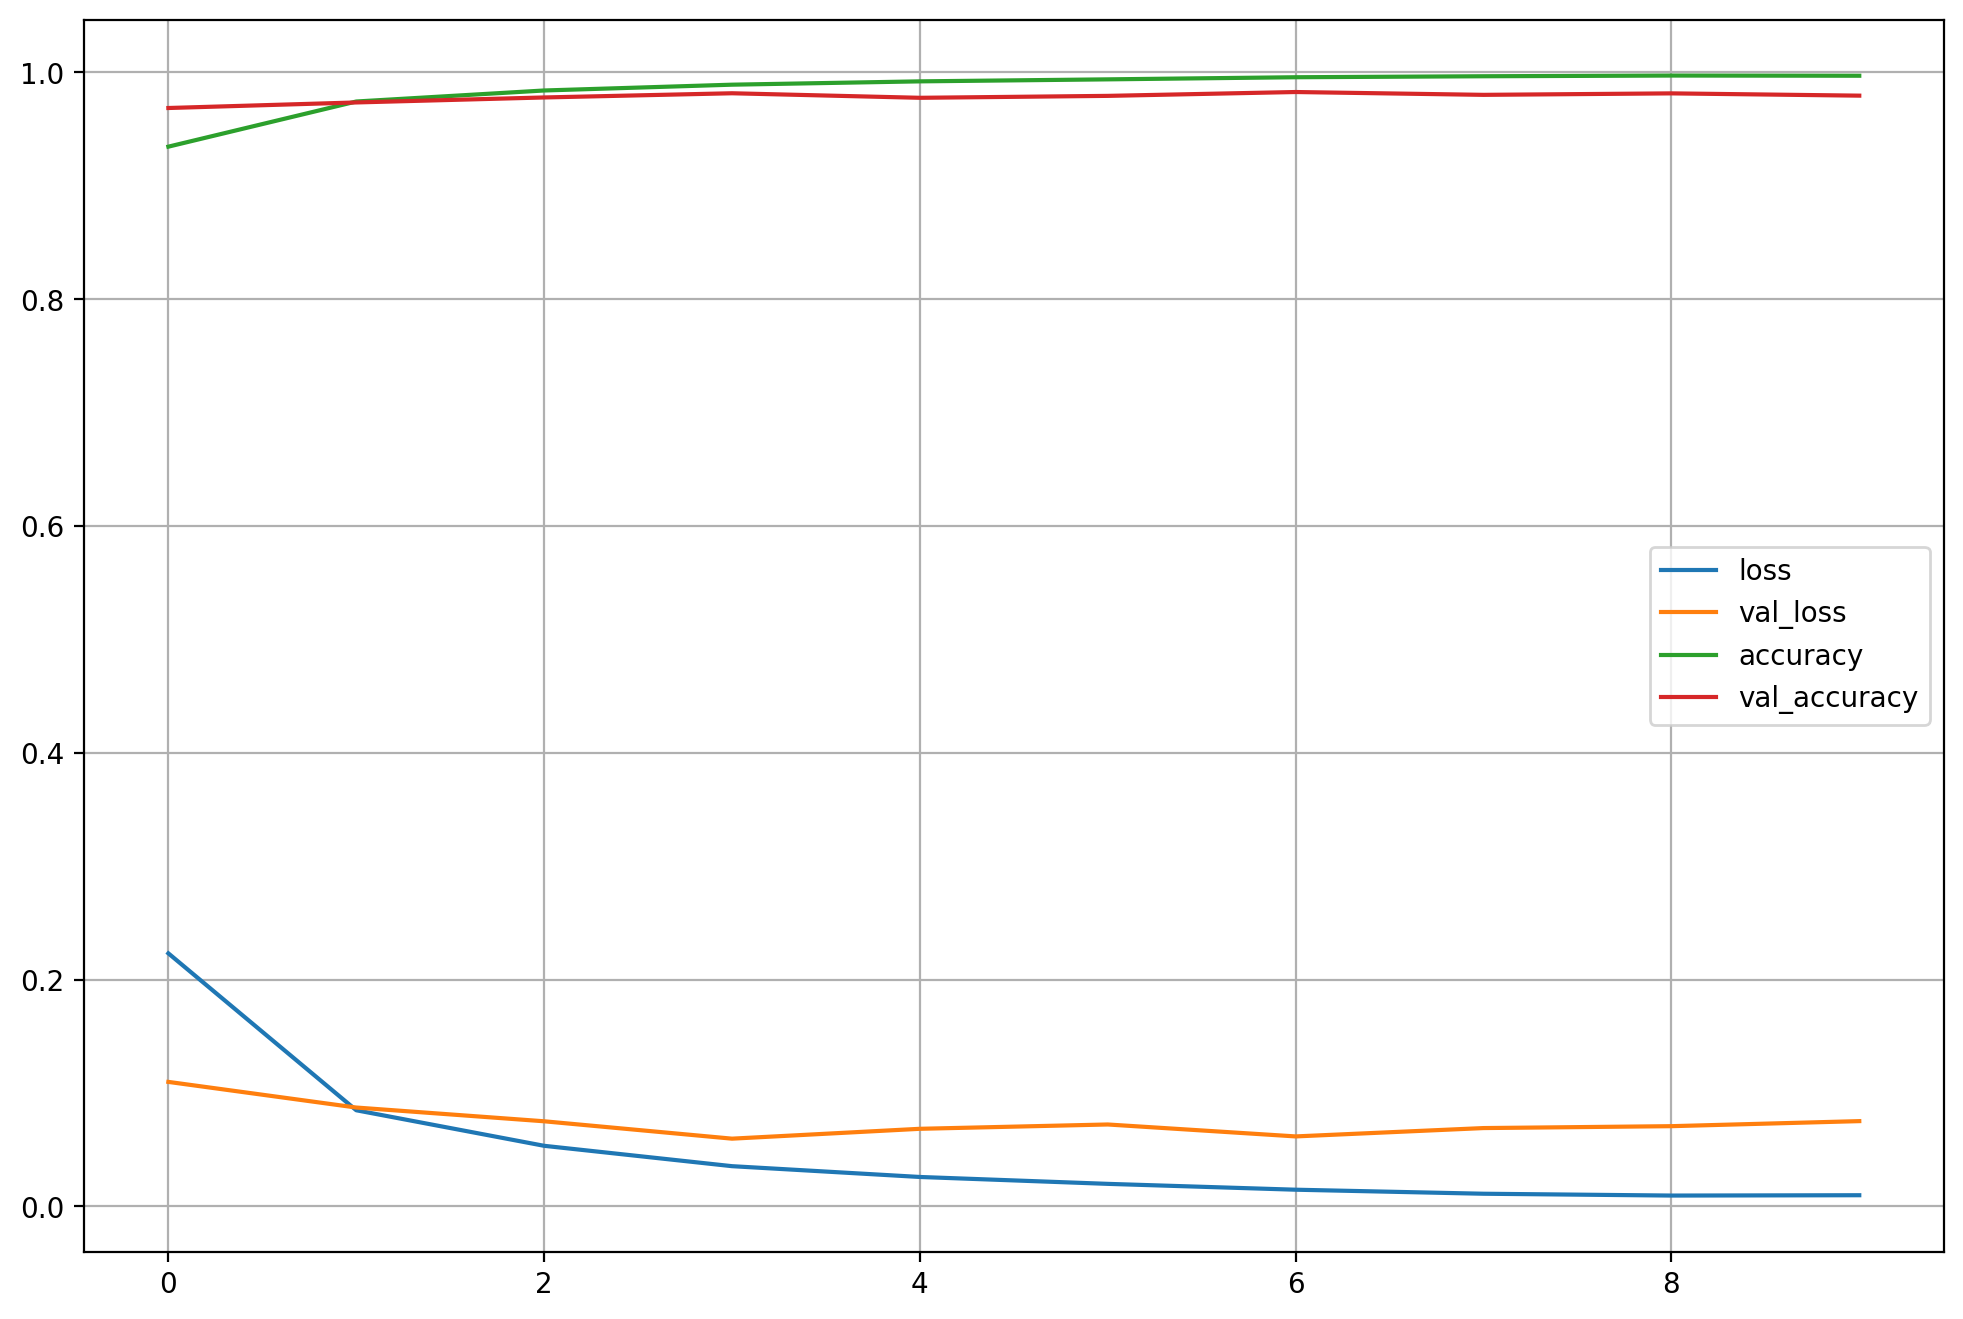

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [11]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9795
Test loss :  0.07519989460706711
Test accuracy :  0.9794999957084656


In [12]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [13]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [14]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

205

In [15]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[3520,
 5495,
 1260,
 2130,
 3503,
 9009,
 1395,
 9280,
 5634,
 4534,
 1468,
 5997,
 1014,
 3565,
 4548,
 1395]

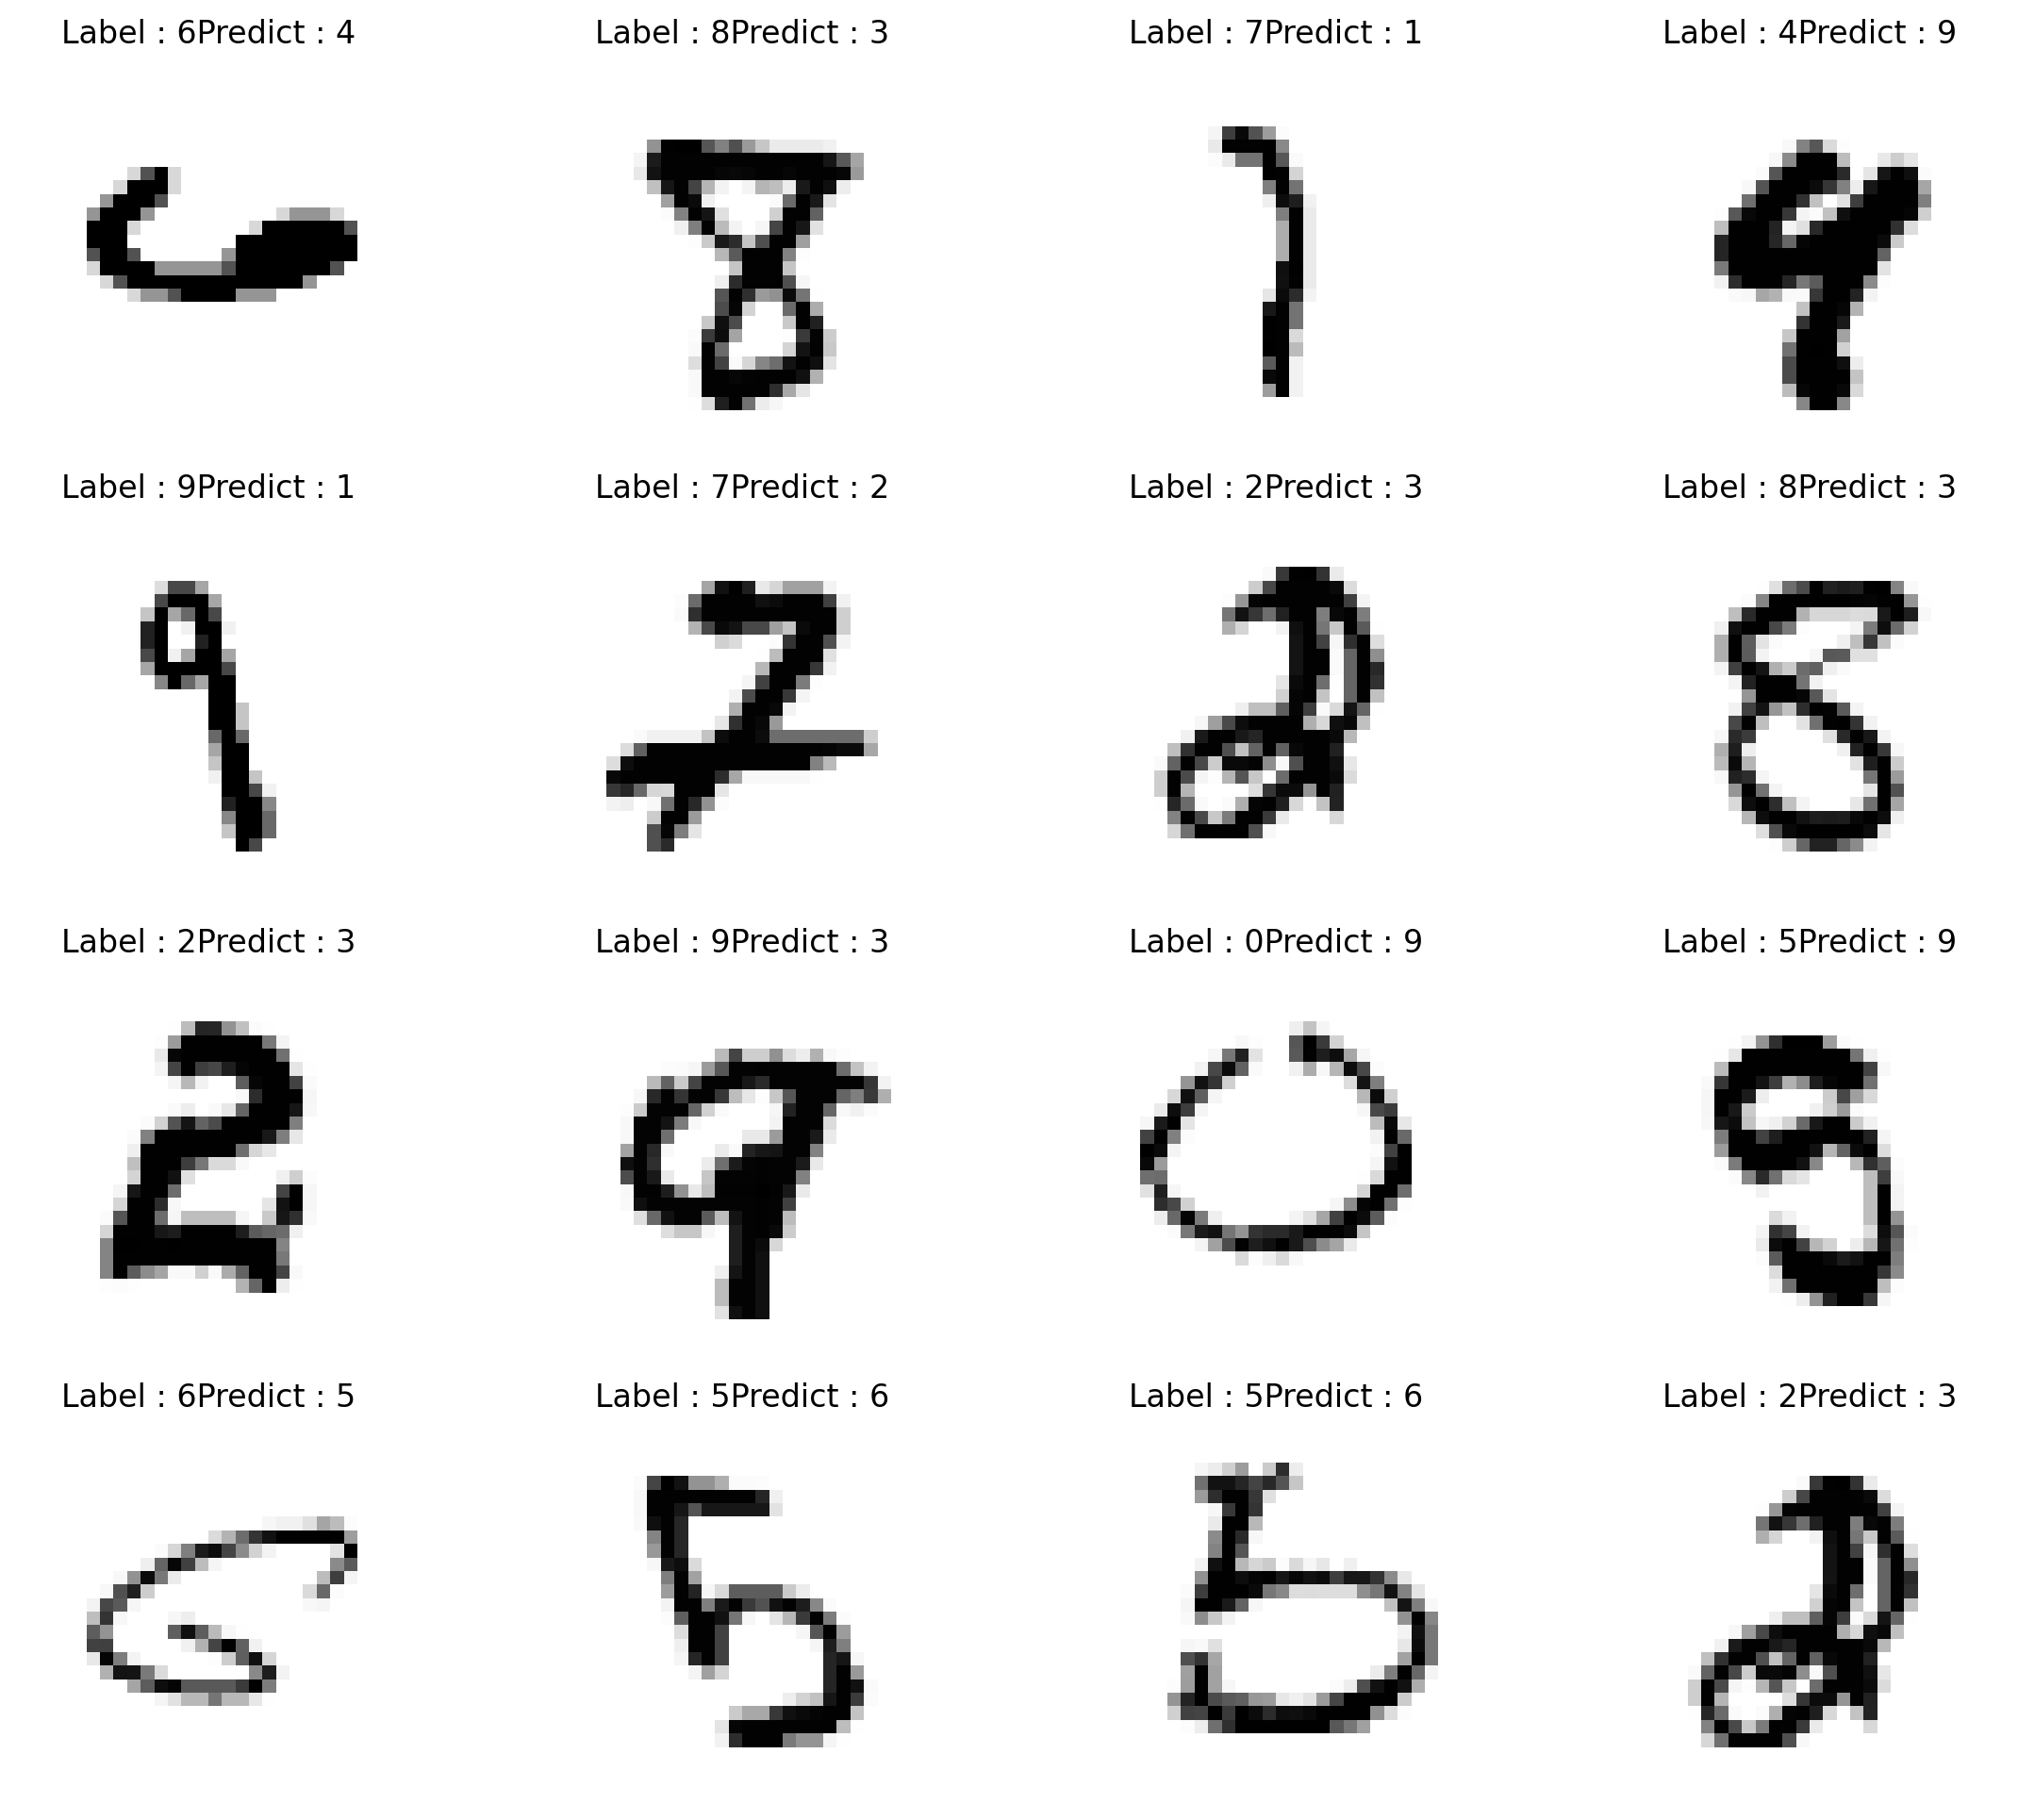

In [16]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + 'Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

### MNIST fashion

In [17]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [18]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

samples = random.choices(population=range(0,len(y_train)), k=16)

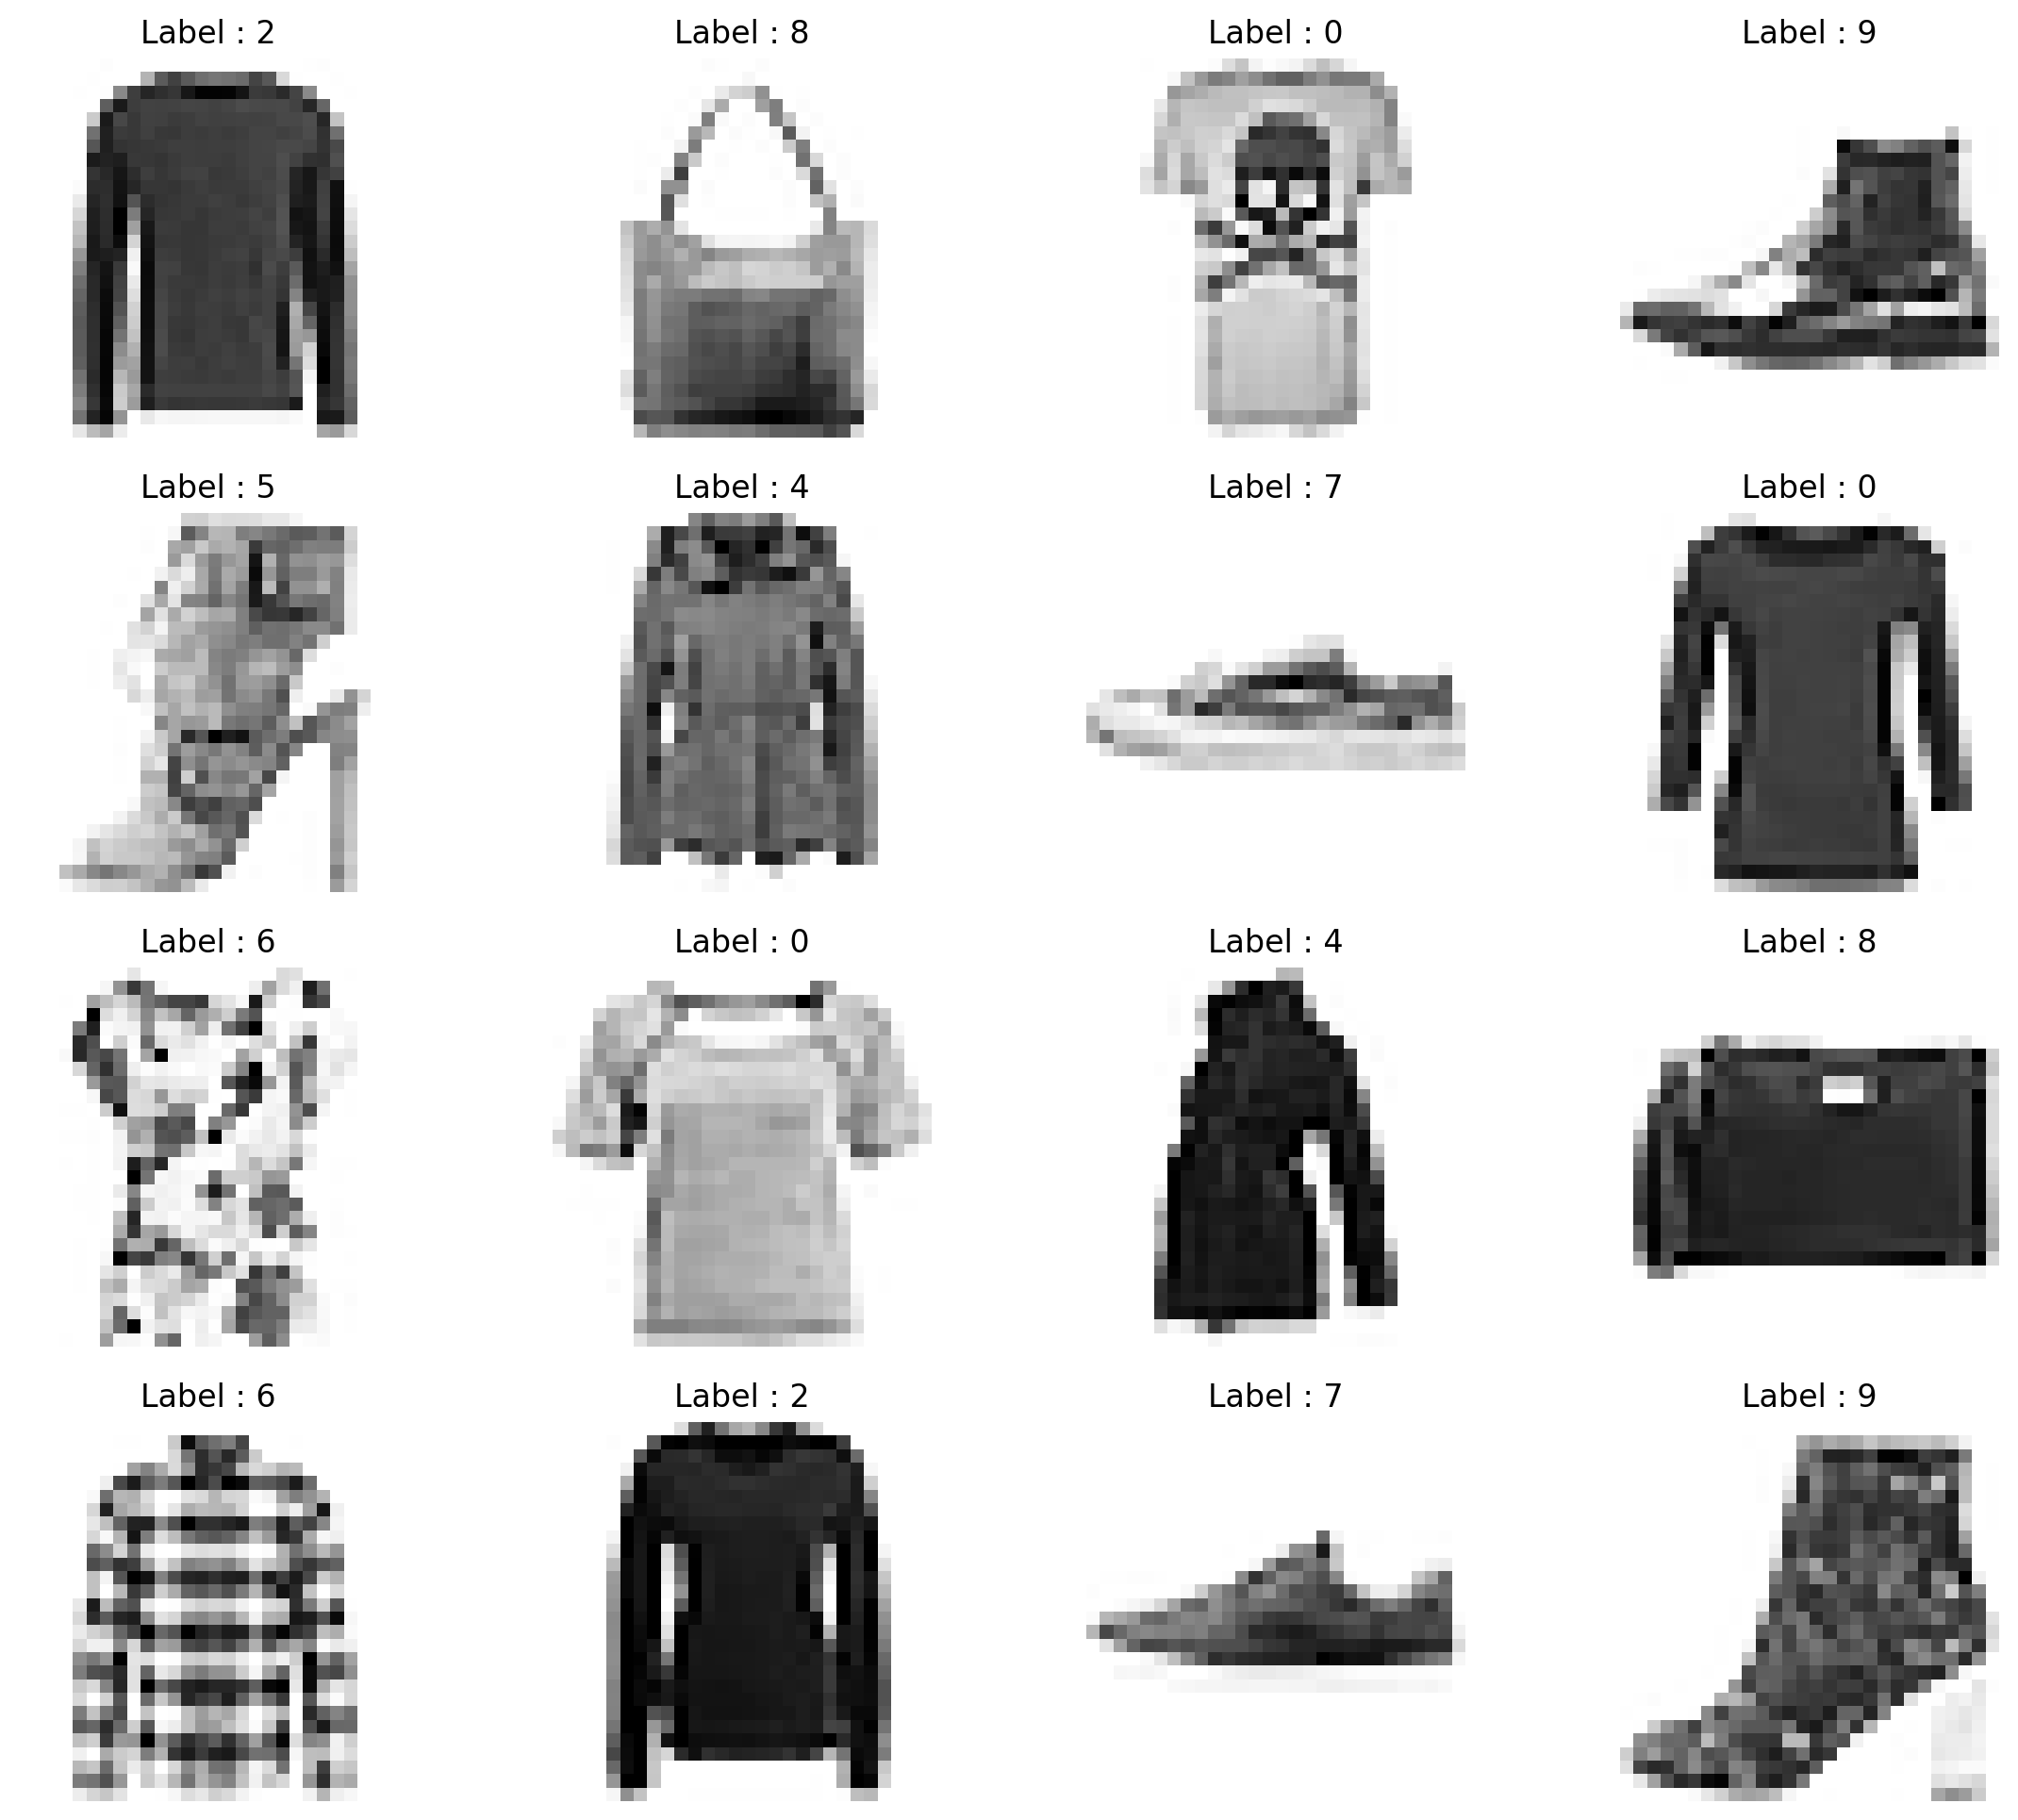

In [19]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')

plt.show()

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [22]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 2s 4ms/step - loss: 0.6051 - accuracy: 0.7875 - val_loss: 0.4030 - val_accuracy: 0.8563
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3556 - accuracy: 0.8699 - val_loss: 0.3822 - val_accuracy: 0.8616
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3263 - accuracy: 0.8825 - val_loss: 0.3549 - val_accuracy: 0.8705
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2974 - accuracy: 0.8892 - val_loss: 0.3458 - val_accuracy: 0.8742
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2730 - accuracy: 0.8982 - val_loss: 0.3385 - val_accuracy: 0.8756
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2676 - accuracy: 0.9002 - val_loss: 0.3396 - val_accuracy: 0.8795
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2449 - accuracy: 0.9079 - val_loss: 0.3314 - val_accuracy: 0.8808
Epoch 

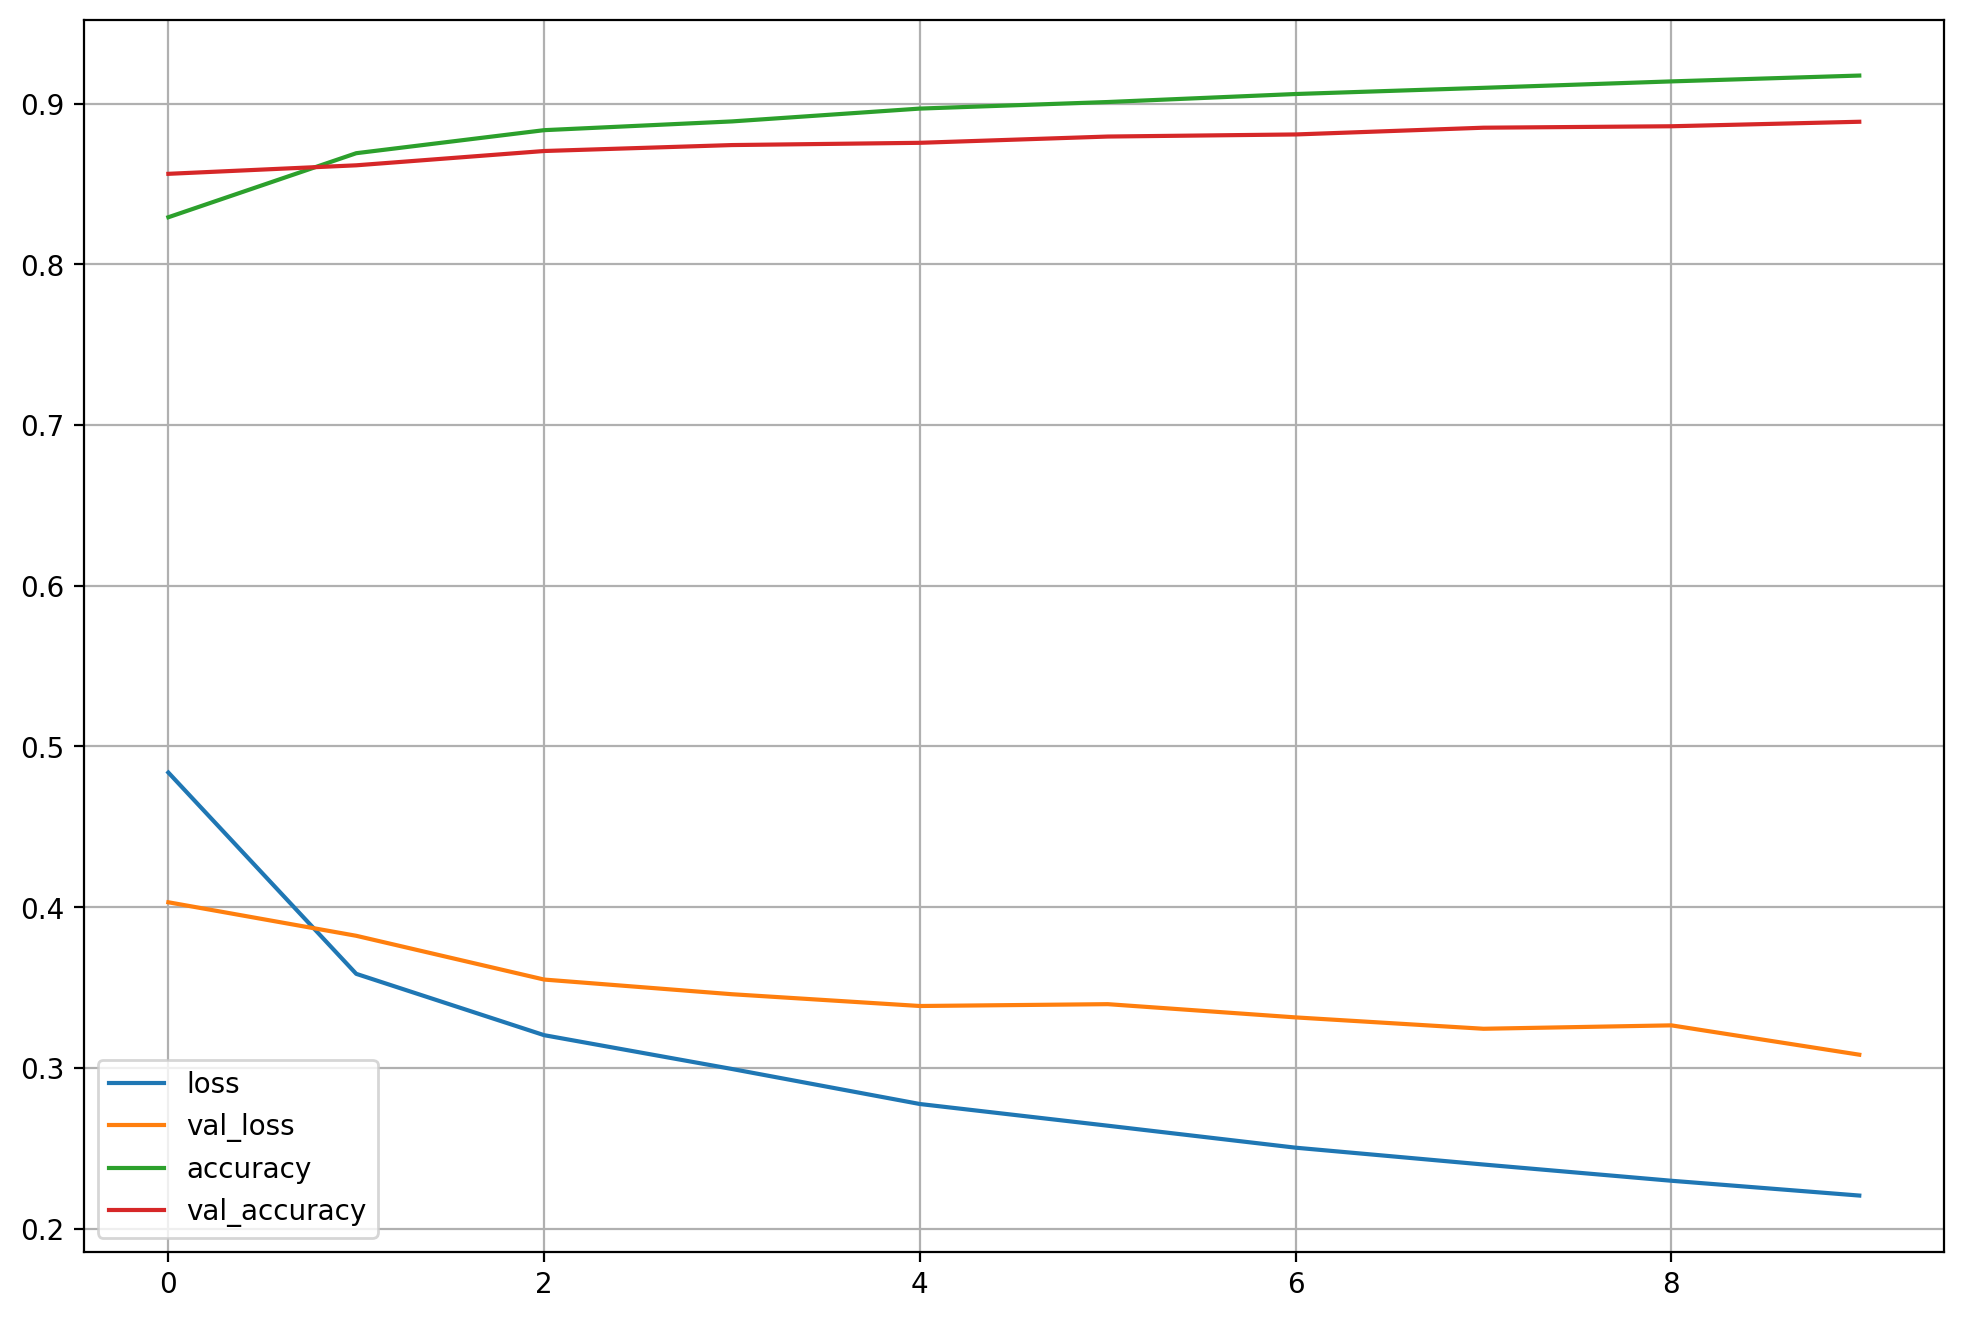

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [25]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.3082 - accuracy: 0.8887
Test loss :  0.30817845463752747
Test accuracy :  0.888700008392334


In [26]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [27]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [28]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

1113

In [29]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[7332,
 8007,
 6816,
 4231,
 7992,
 6770,
 2940,
 4777,
 5442,
 6012,
 2920,
 7068,
 7334,
 6242,
 4010,
 3041]

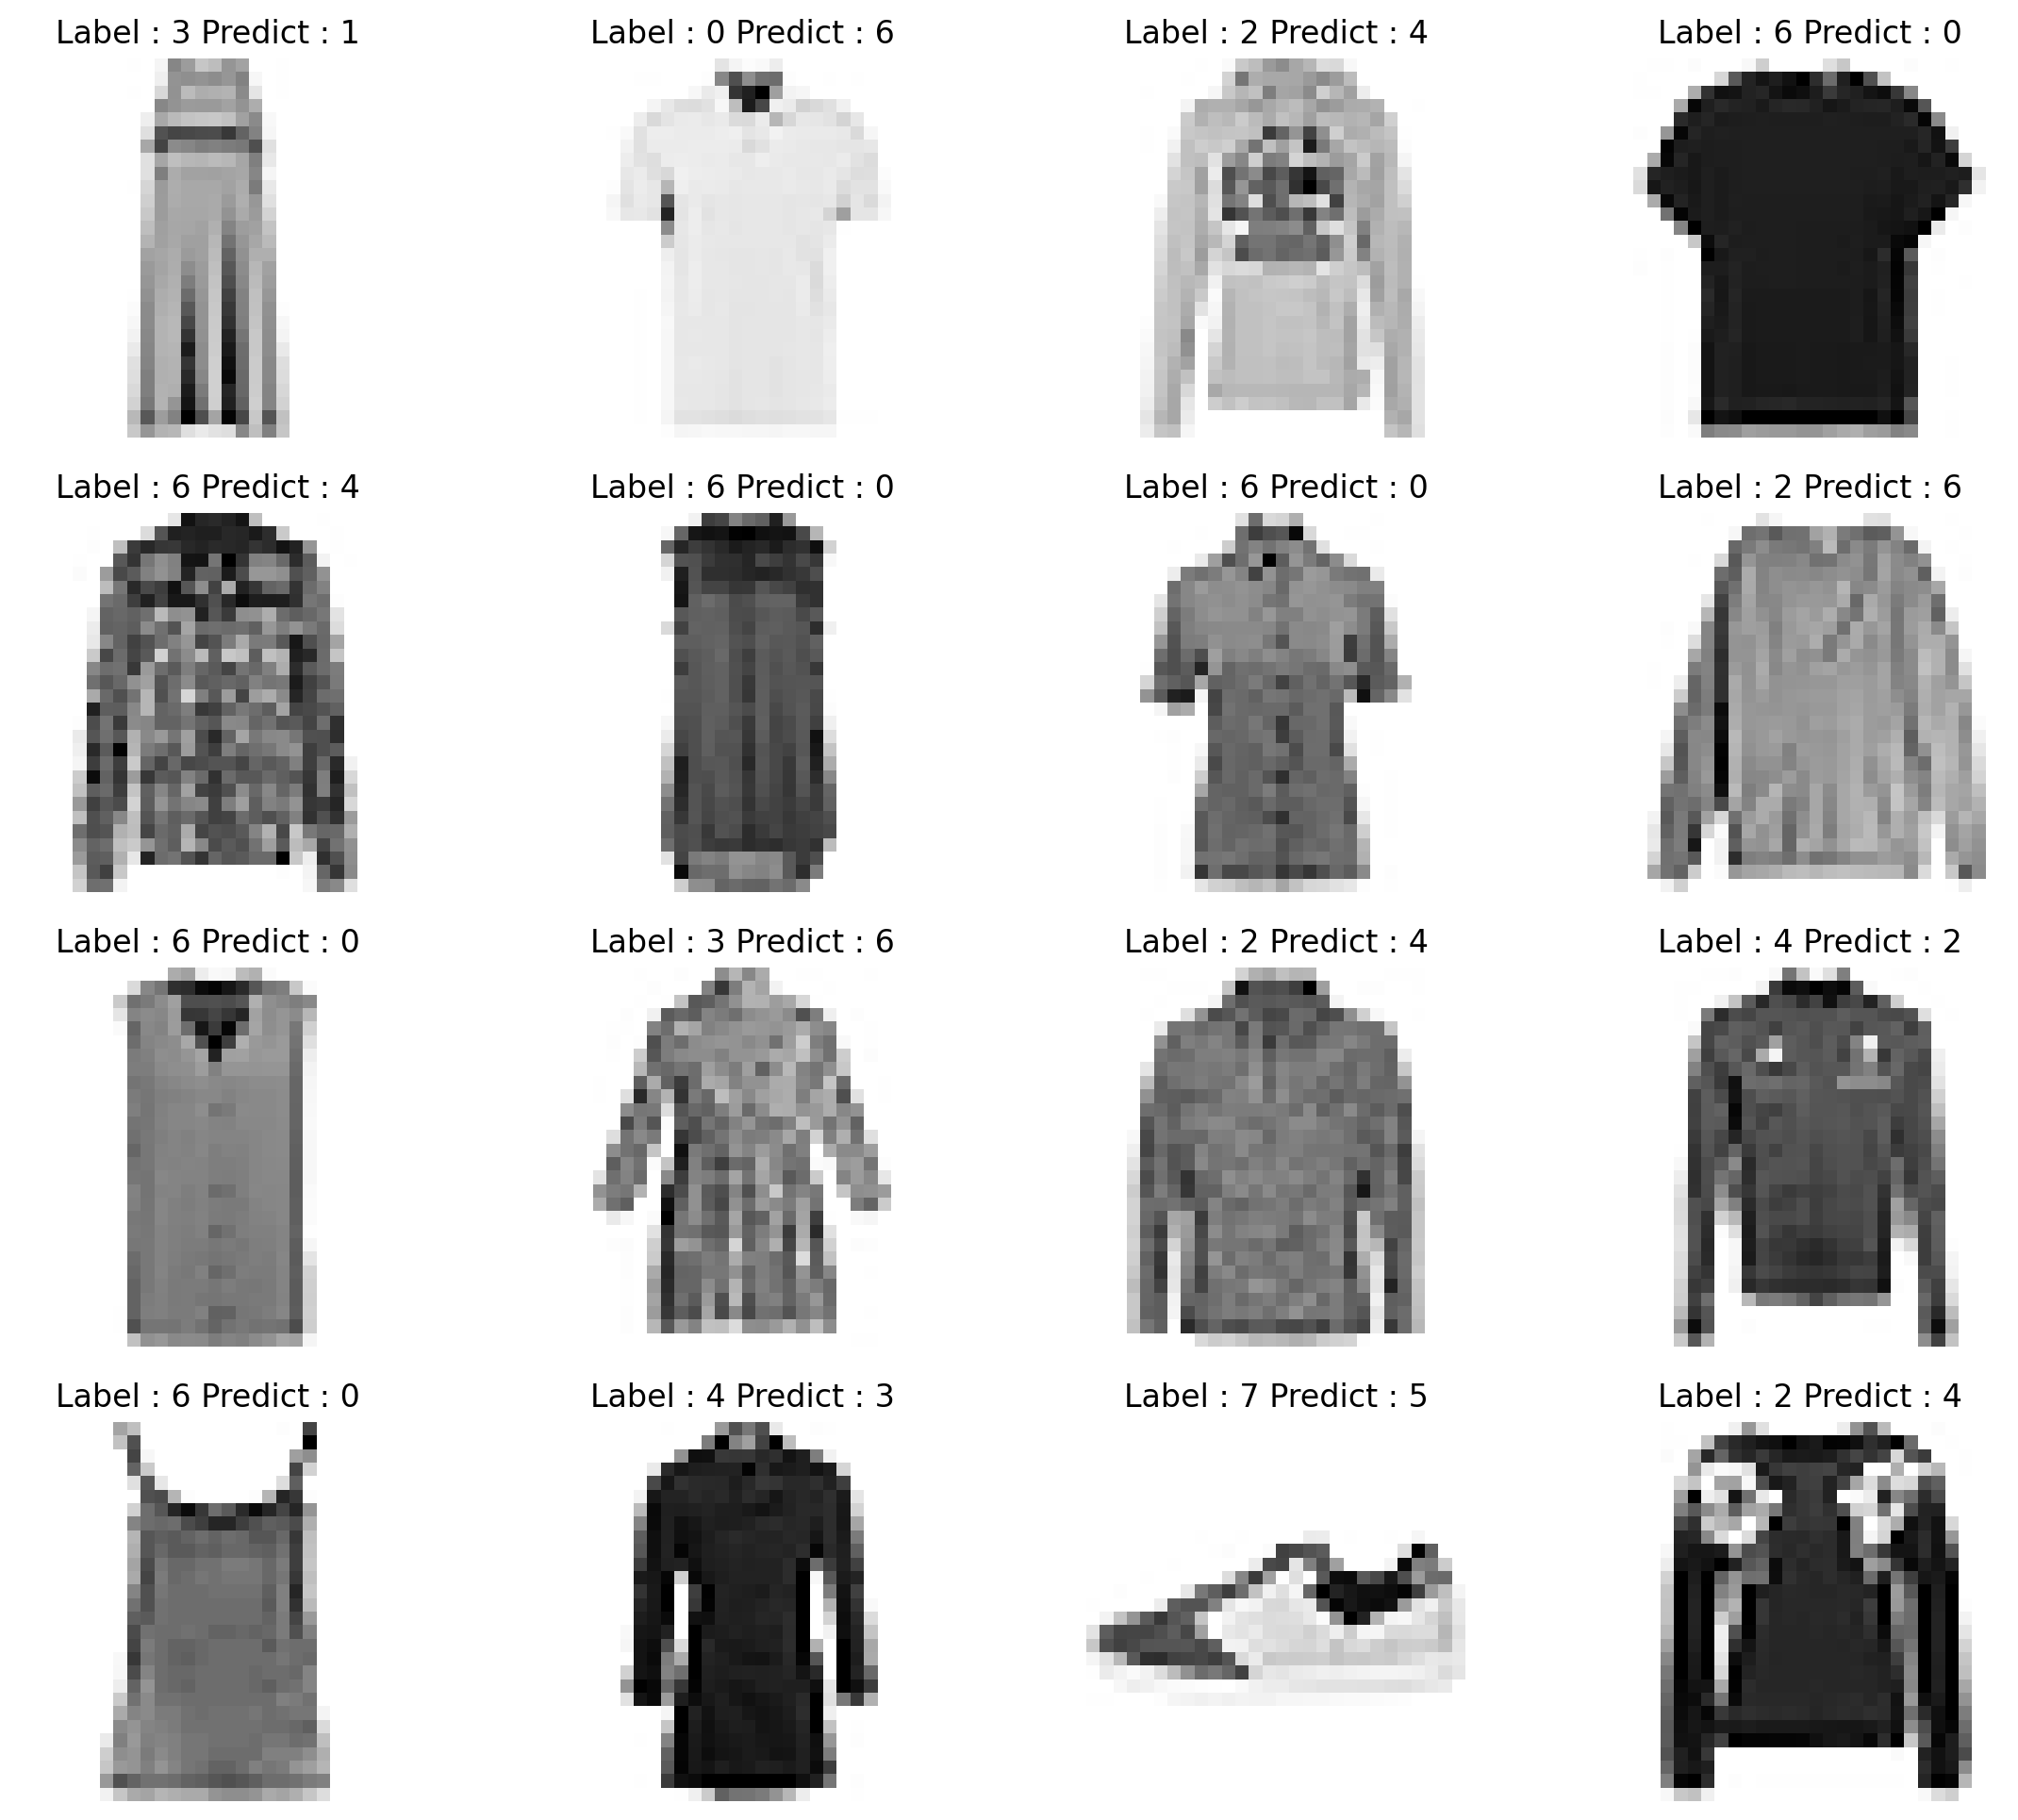

In [30]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()